# 주가 지수화 & 선물

ref : https://github.com/FinanceData/FinanceDataReader

In [30]:
# !pip install bokeh # 캔들차트
# !pip install mplfinance # 캔들차트

In [1]:
from pandas_datareader import data as pdr
import FinanceDataReader as fdr
import yfinance as yf
from pykrx import stock

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 함수

In [4]:
# 강사님 차트 함수
def myplot(df, nrows=5,  kind='line', title='제목', labels=False):  
#     if nrows > 0:
#         print(df.head(nrows))
#     else:
#         print(df.tail(nrows))
    if labels:
        cols = df.columns
        for i, col in enumerate(cols):
            df[col].plot(label=labels[i], kind=kind)
    else :
        df.plot(kind=kind)
    
    plt.title(title)
    plt.legend()
    plt.show()


In [5]:
# 강사님 차트 함수
def myplotmix(df1, df2, y1='ylabel-1', y2='ylabel-2', kind1='bar', kind2='line', title='제목',  nrows1=5, nrows2=5,  labels=False):  
    ytl=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    if nrows1 > 0:
        print(df1.head(nrows1))
    elif nrows1 < 0:
        print(df1.tail(nrows1))
    if nrows2 > 0:
        print(df2.head(nrows2))
    else:
        print(df2.tail(nrows2))
    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax2=ax1.twinx()
    if kind1 == 'line':
        df1.plot(kind=kind1, ax=ax2, marker='d',color='#e35f62')  #color='y', 
        df2.plot(kind=kind2, ax=ax1)  #bar
    else:
        df1.plot(kind=kind1, ax=ax1,color='#bcbd22')
        df2.plot(kind=kind2, ax=ax2) #color='y',
        
    # df['date'] = df['date'].dt.strftime('%Y-%m-%d') # 양축 차트가 안나온다 함
    # ax1.set_xticklabels(df['date'])    
    ax1.yaxis.tick_right()
    ax2.yaxis.tick_left()
    ax1.set_ylabel(y1) #, color='red')
    ax2.set_ylabel(y2) #, color='red')
    ax1.legend(loc=1)
    ax2.legend(loc=2)
    plt.title(title)
    ax1.grid(False)
    
    plt.show()

- 데이터 불러오기

In [6]:
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
ss = fdr.DataReader('005930','2021-05-01')

#LG전자 (066570)
lg = fdr.DataReader('066570','2021-05-01')

# Apple(AAPL), 2017-01-01 ~ Now
ap = fdr.DataReader('AAPL', '2021-05-01')

In [7]:
print(ss.shape, lg.shape, ap.shape)

(17, 6) (17, 6) (18, 6)


In [11]:
df = pd.concat([ss['Close'], lg['Close'], ap['Close']],axis=1, keys =['ss','lg','ap'])    
# concat 안에 리스트로 묶어줘야 함. keys: column 설정
df.head()

,ss,lg,ap
Date,,,
2021-05-03,81700.0,155000.0,132.54
2021-05-04,82600.0,154500.0,127.85
2021-05-05,NaN,NaN,128.10
2021-05-06,82300.0,151500.0,129.74
2021-05-07,81900.0,153000.0,130.21


<AxesSubplot:xlabel='Date'>

findfont: Font family ['New Gulim'] not found. Falling back to DejaVu Sans.


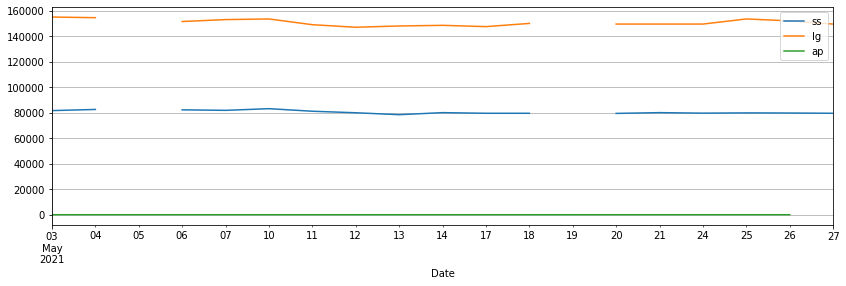

In [12]:
df.plot() # 지수가 달라 비교 불가 -> 변동률 

# 변동률 계산
df[기준].pct_change(periods=N) * 100 

In [13]:
df['ssv'] = df['ss'].pct_change(periods=1) * 100 # periods : shift
df['lgv'] = df['lg'].pct_change(periods=1) * 100
df['apv'] = df['ap'].pct_change(periods=1) * 100
# 기존 코드 : df['변동률'] = (df['기준일']-df['전일']) / df['전일'] * 100

df.fillna(0,inplace=True)df.head()

,ss,lg,ap,ssv,lgv,apv
Date,,,,,,
2021-05-03,81700.0,155000.0,132.54,0.000000,0.000000,0.000000
2021-05-04,82600.0,154500.0,127.85,1.101591,-0.322581,-3.538554
2021-05-05,0.0,0.0,128.10,0.000000,0.000000,0.195542
2021-05-06,82300.0,151500.0,129.74,-0.363196,-1.941748,1.280250
2021-05-07,81900.0,153000.0,130.21,-0.486027,0.990099,0.362263


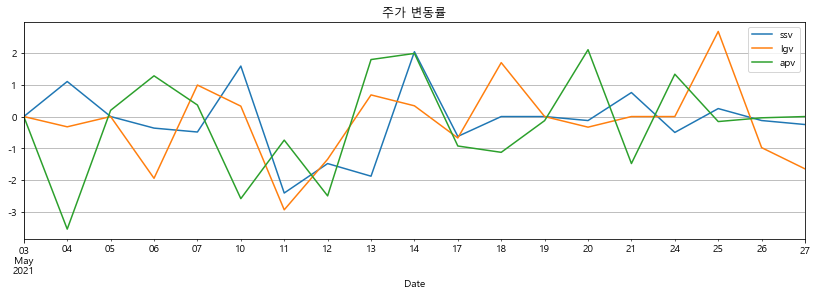

In [24]:
myplot(df[['ssv','lgv','apv']],title='주가 변동률')

In [25]:
# df.to_csv('sample.csv',index=False)
# 회귀분석등 간단하게 엑셀로 확인

# 캔들 차트

In [32]:
# 캔들 차트 그리기
ss = fdr.DataReader('005930','2021-05-01')
fdr.chart.plot(ss)

Loading BokehJS ...